In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score

In [2]:
#loading dataset
data=pd.read_csv(r"C:\Users\bobby patel\Desktop\Propulsion_\propulsion.csv",index_col="Unnamed: 0")

In [3]:
#viewing top 5 data
data.head()

,Lever position (lp) [ ],Ship speed (v) [knots],Gas Turbine shaft torque (GTT) [kN m],Gas Turbine rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],HP Turbine exit temperature (T48) [C],GT Compressor inlet air temperature (T1) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor inlet air pressure (P1) [bar],GT Compressor outlet air pressure (P2) [bar],Gas Turbine exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Compressor decay state coefficient.,GT Turbine decay state coefficient.
0,9.300,27.0,72762.205,3560.393,9753.812,644.806,644.806,1086.583,288.0,780.304,4.523,0.998,22.879,1.050,90.435,1.790,0.973,0.978
1,6.175,18.0,29760.552,2306.825,8780.012,246.011,246.011,776.921,288.0,665.511,2.518,0.998,13.438,1.030,34.596,0.685,0.995,0.975
2,3.144,9.0,8375.774,1386.739,7051.621,60.318,60.318,589.764,288.0,580.587,1.392,0.998,7.566,1.020,12.477,0.247,0.980,0.978
3,3.144,9.0,8377.589,1386.748,7098.469,60.339,60.339,570.651,288.0,576.565,1.390,0.998,7.409,1.021,11.678,0.231,0.984,1.000
4,6.175,18.0,29761.091,2306.825,8782.024,246.021,246.021,769.855,288.0,663.682,2.518,0.998,13.374,1.031,34.154,0.676,0.998,0.980


# predicting GT Turbine decay state coefficient.

In [4]:
#viewing statistics ofdata
data.describe()

,Lever position (lp) [ ],Ship speed (v) [knots],Gas Turbine shaft torque (GTT) [kN m],Gas Turbine rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],HP Turbine exit temperature (T48) [C],GT Compressor inlet air temperature (T1) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor inlet air pressure (P1) [bar],GT Compressor outlet air pressure (P2) [bar],Gas Turbine exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Compressor decay state coefficient.,GT Turbine decay state coefficient.
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.150075,14.951400,27100.647714,2131.151788,8194.182366,225.957785,225.957785,734.476178,288.0,645.748980,2.345732,9.980000e-01,12.262597,1.029402,33.480715,0.659100,0.975021,0.987455
std,2.624015,7.740467,22062.780307,772.211732,1090.569425,199.737886,199.737886,173.009157,0.0,72.483036,1.081038,2.236101e-13,5.320817,0.010353,25.721725,0.504791,0.014734,0.007510
min,1.138000,3.000000,253.547000,1307.675000,6589.002000,5.304000,5.304000,444.731000,288.0,540.999000,1.093000,9.980000e-01,5.828000,1.019000,0.000000,0.068000,0.950000,0.975000
25%,3.144000,9.000000,8375.791500,1386.758000,7056.520500,60.317000,60.317000,589.841000,288.0,577.980750,1.389000,9.980000e-01,7.445000,1.020000,13.534000,0.246000,0.962000,0.981000
50%,5.140000,15.000000,21630.133500,1924.325000,8480.527000,175.264000,175.264000,705.351000,288.0,636.800000,2.082000,9.980000e-01,11.086000,1.026000,25.249500,0.496000,0.975000,0.987000
75%,7.148000,21.000000,39000.710250,2678.078000,9132.132500,332.360000,332.360000,833.154750,288.0,693.656750,2.981000,9.980000e-01,15.649000,1.036000,44.500000,0.881000,0.988000,0.994000
max,9.300000,27.000000,72783.338000,3560.741000,9797.103000,645.249000,645.249000,1115.797000,288.0,789.094000,4.560000,9.980000e-01,23.140000,1.052000,92.556000,1.832000,1.000000,1.000000


In [5]:
#checking for null value
data.isnull().any()

Lever position (lp) [ ]                          False
Ship speed (v) [knots]                           False
Gas Turbine shaft torque (GTT) [kN m]            False
Gas Turbine rate of revolutions (GTn) [rpm]      False
Gas Generator rate of revolutions (GGn) [rpm]    False
Starboard Propeller Torque (Ts) [kN]             False
Port Propeller Torque (Tp) [kN]                  False
HP Turbine exit temperature (T48) [C]            False
GT Compressor inlet air temperature (T1) [C]     False
GT Compressor outlet air temperature (T2) [C]    False
HP Turbine exit pressure (P48) [bar]             False
GT Compressor inlet air pressure (P1) [bar]      False
GT Compressor outlet air pressure (P2) [bar]     False
Gas Turbine exhaust gas pressure (Pexh) [bar]    False
Turbine Injecton Control (TIC) [%]               False
Fuel flow (mf) [kg/s]                            False
GT Compressor decay state coefficient.           False
GT Turbine decay state coefficient.              False
dtype: boo

In [6]:
#assigning feature and target variable to x and y
x=data.drop("GT Turbine decay state coefficient.",axis=1)
y=data.get("GT Turbine decay state coefficient.")

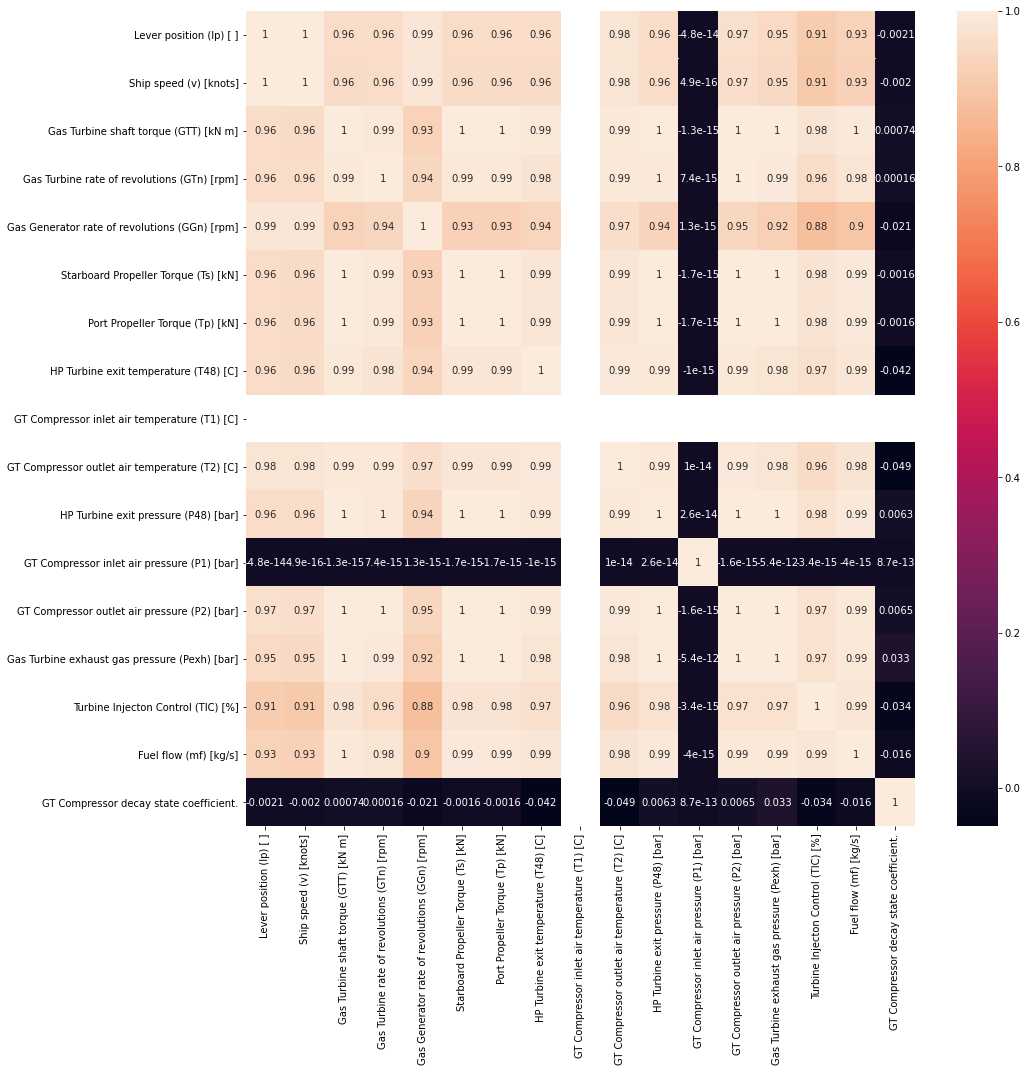

In [7]:
#plotting heatmap to check corelation
corelation=x.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corelation,annot=True,)

- since,all the features are highly co-related to each other we need to select best features to evalute models.

### now we use f-test for feature selection and first select 5,10,and 15 best features and evaluate our model

In [8]:
#using scikit learn to find f-test
from sklearn.feature_selection import f_regression
def f_test(feature,target):
  f_test=f_regression(feature,target)
  f_values=f_test[0]
  f_values=pd.Series(f_values,index=feature.columns)
  return f_values


In [9]:
#calling f_test for x
values=f_test(x,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:295: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) -
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:307: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [10]:

#assigning top 5,10 and 15 best features
top5_f_value=values.nlargest(5)
top10_f_value=values.nlargest(10)
top15_f_value=values.nlargest(15)

In [11]:
#defining a function for Evaluating model
def Model_Evaluation(best_features):
  X=data.loc[:,best_features.index]
  Y=y
  lr_reg=LinearRegression()
  dt_reg=DecisionTreeRegressor()
  rf_reg=RandomForestRegressor()
  svr_reg=SVR()
  model=[lr_reg,dt_reg,rf_reg,svr_reg]
  for i in model:
    evaluate=cross_val_score(i,X,Y,cv=10,scoring="neg_mean_squared_error",verbose=1).mean()
    rmse_val=-evaluate
    rmse=print("rmse of "+str(i)+" is={}".format(rmse_val))

  return rmse

In [12]:
#modl evaluation using 15 best feature
Model_Evaluation(top15_f_value)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


rmse of LinearRegression() is=3.1473428736446953e-06


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


rmse of DecisionTreeRegressor() is=1.246400000000005e-06


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  3.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


rmse of RandomForestRegressor() is=3.6014723999995865e-07
rmse of SVR() is=5.6389600000000176e-05


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished


In [13]:
#model evaluation using 10 best features
Model_Evaluation(top10_f_value)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


rmse of LinearRegression() is=1.3798426226131697e-05


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


rmse of DecisionTreeRegressor() is=1.5950000000000072e-06
rmse of RandomForestRegressor() is=5.787842399999598e-07
rmse of SVR() is=5.6389600000000176e-05


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


In [14]:
#model evaluation using 5 best features
Model_Evaluation(top5_f_value)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


rmse of LinearRegression() is=5.19926627243675e-05


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


rmse of DecisionTreeRegressor() is=4.593700000000013e-06
rmse of RandomForestRegressor() is=2.324144829999949e-06
rmse of SVR() is=5.6389600000000176e-05


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


- from above results we conclude that Random Forest Regressor with 15 best feature has lowest **rmse** value

#### now we use Extra Tree Regressor to select features

In [15]:
from sklearn.tree import ExtraTreeRegressor
ex=ExtraTreeRegressor()
ex.fit(x,y)

ExtraTreeRegressor()

In [16]:
imp_feature=ex.feature_importances_
imp_feature=pd.Series(imp_feature,index=x.columns)

In [17]:
top5_imp=imp_feature.nlargest(5)
top10_imp=imp_feature.nlargest(10)
top15_imp=imp_feature.nlargest(15)

In [18]:
Model_Evaluation(top5_imp)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


rmse of LinearRegression() is=4.88077101468363e-05


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


rmse of DecisionTreeRegressor() is=1.9666000000000054e-06
rmse of RandomForestRegressor() is=8.26893559999957e-07
rmse of SVR() is=5.6389600000000176e-05


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


In [19]:
Model_Evaluation(top10_imp)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


rmse of LinearRegression() is=1.7552565844425878e-05


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


rmse of DecisionTreeRegressor() is=1.2858000000000055e-06


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


rmse of RandomForestRegressor() is=3.781425099999616e-07
rmse of SVR() is=5.6389600000000176e-05


In [20]:
Model_Evaluation(top15_imp)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


rmse of LinearRegression() is=3.1473428736438017e-06


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


rmse of DecisionTreeRegressor() is=1.162700000000005e-06


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  2.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


rmse of RandomForestRegressor() is=3.542668799999612e-07
rmse of SVR() is=5.6389600000000176e-05


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


- from above results again RandomForest Regressor gives lowest **rmse** when using features selected from ExtraTreeRegressor.

#### so, i am going to use 15 features selected from f-test

In [21]:
#assigning X and Y 
X=data.loc[:,top15_f_value.index]
Y=y
#splitting X andY
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,shuffle=True,random_state=42)
#defining model 
model=RandomForestRegressor()
#fitting model
model.fit(X_train,Y_train)
#model prediction
model_pred=model.predict(X_test)



In [22]:
#finding accuracy of model
from sklearn.metrics import r2_score
print("accuracy of model :{}".format(r2_score(model_pred,Y_test)))


accuracy of model :0.9925936961400763


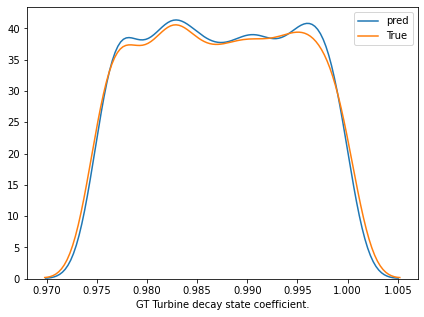

In [23]:
#plotting prediction and true value
plt.figure(figsize=(7,5))
ax=sns.distplot(model_pred,hist=False,label="pred")
sns.distplot(Y_test,hist=False,label="True",ax=ax)

# predicting GT Compressor decay state coefficient. 

In [24]:
x_2=data.drop("GT Compressor decay state coefficient.",axis=1)
y_2=data.get("GT Compressor decay state coefficient.")

In [25]:
corelation_2=x_2.corr()

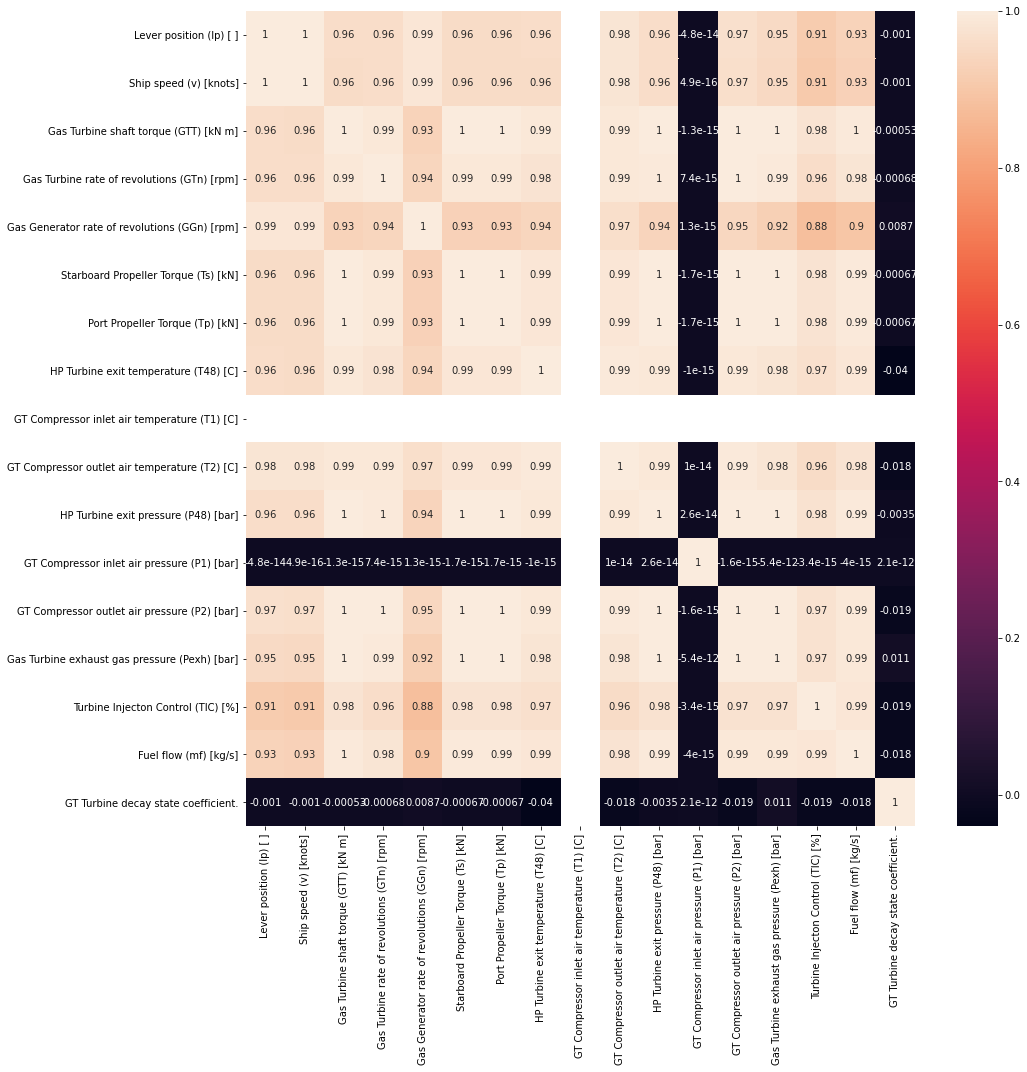

In [26]:
plt.figure(figsize=(15,15))
sns.heatmap(corelation_2,annot=True)

In [27]:
#finding best features for GT Compressor decay state coefficient.
values_2=f_test(x_2,y_2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:295: RuntimeWarning: invalid value encountered in sqrt
  X_norms = np.sqrt(row_norms(X.T, squared=True) -
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:307: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [28]:
#defining variables to top 5,10 and 15 best features
top5_f_value2=values_2.nlargest(5)
top10_f_value2=values_2.nlargest(10)
top15_f_value2=values_2.nlargest(15)


In [29]:
#evaluating model
Model_Evaluation(top5_f_value2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


rmse of LinearRegression() is=5.150297545947155e-05


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


rmse of DecisionTreeRegressor() is=2.376400000000006e-06
rmse of RandomForestRegressor() is=8.690954399999474e-07
rmse of SVR() is=5.6389600000000176e-05


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [30]:
Model_Evaluation(top10_f_value2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


rmse of LinearRegression() is=1.3798426226129451e-05


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


rmse of DecisionTreeRegressor() is=1.5876000000000056e-06
rmse of RandomForestRegressor() is=5.645073499999543e-07
rmse of SVR() is=5.6389600000000176e-05


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


In [31]:
Model_Evaluation(top15_f_value2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


rmse of LinearRegression() is=1.0401870592437688e-32


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


rmse of DecisionTreeRegressor() is=1.472292645871015e-29


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


rmse of RandomForestRegressor() is=3.3534957793059325e-30
rmse of SVR() is=5.6389600000000176e-05


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


### again with 15 best feature **rmse** is minimum for RandomForestRegressor

In [32]:
#splitting data to train and test
x2_train,x2_test,y2_train,y2_test=train_test_split(x_2,y_2,test_size=0.2,shuffle=True,random_state=42)

In [33]:
#fitting models
model2=RandomForestRegressor()
model2.fit(x2_train,y2_train)
model2_prediction=model2.predict(x2_test)


In [34]:
#model accuracy
print("model accuracy:{}".format(r2_score(model2_prediction,y2_test)))

model accuracy:0.9947356880525239


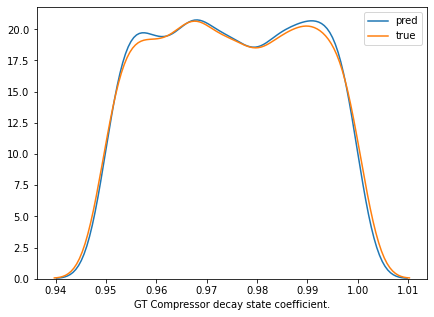

In [35]:
#plotting prediction and true value
plt.figure(figsize=(7,5))
ax=sns.distplot(model2_prediction,hist=False,label="pred")
sns.distplot(y2_test,hist=False,label="true")